In [5]:
import multiprocessing as mp

import numpy as np
import osmnx as ox

np.random.seed(0)
ox.__version__

'1.9.3'

# OSMnx

Graphs for further work

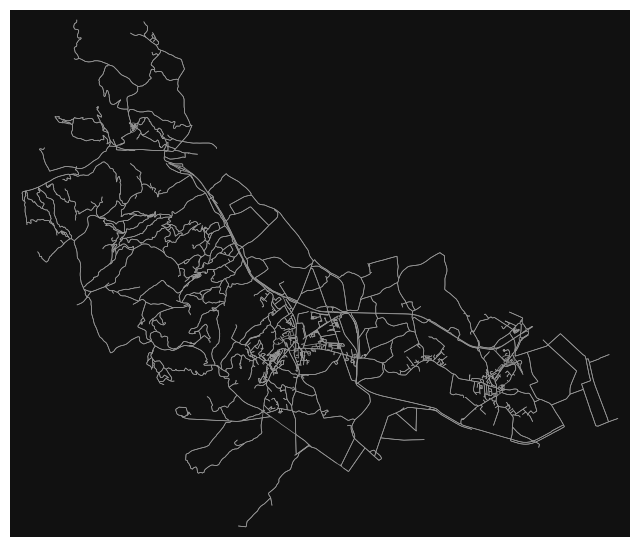

In [8]:
# you can get networks anywhere in the world
G = ox.graph_from_place("Sinalunga, Italy", network_type="all")
fig, ax = ox.plot_graph(G, node_size=0, edge_linewidth=0.5)

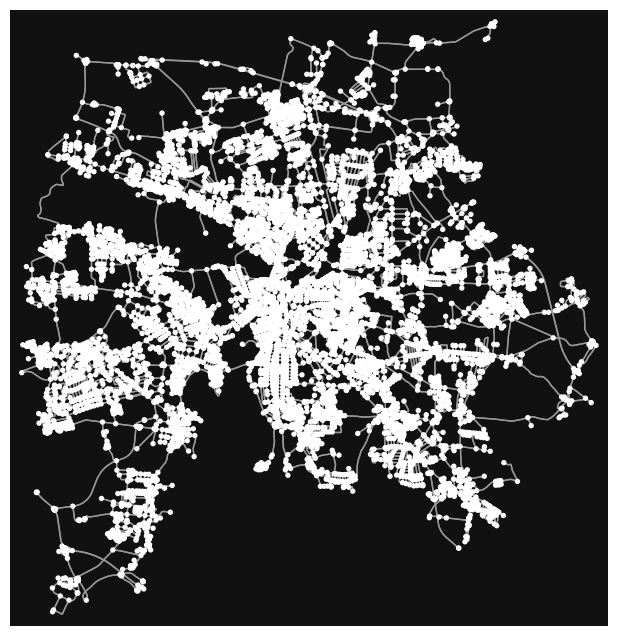

In [9]:
# download/model a street network for some city then visualize it
Z = ox.graph_from_place("Leipzig, Saxony, Germany", network_type="drive")
fig, ax = ox.plot_graph(Z)

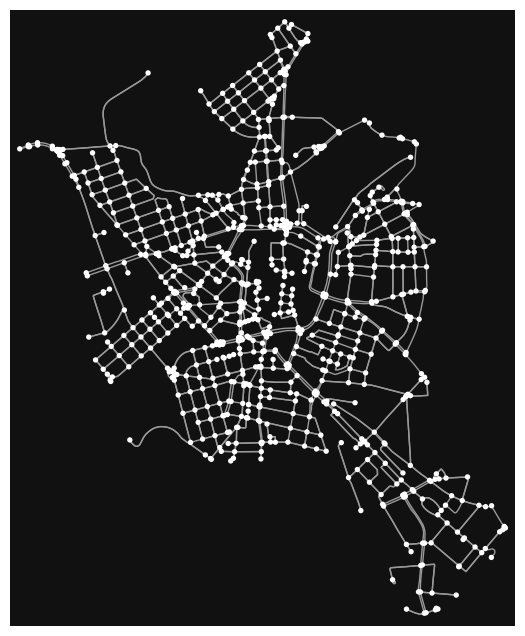

In [10]:
Y = ox.graph_from_place("Mitte, Leipzig, Saxony, Germany", network_type="drive")
fig, ax = ox.plot_graph(Y)

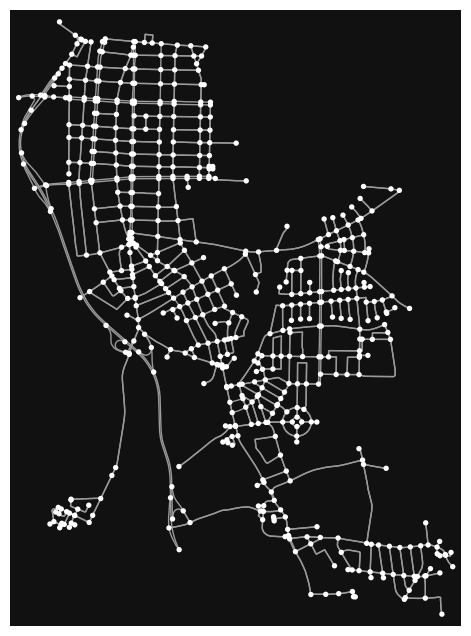

In [11]:
W = ox.graph_from_place("Sued, Leipzig, Saxony, Germany", network_type="drive")
fig, ax = ox.plot_graph(W)

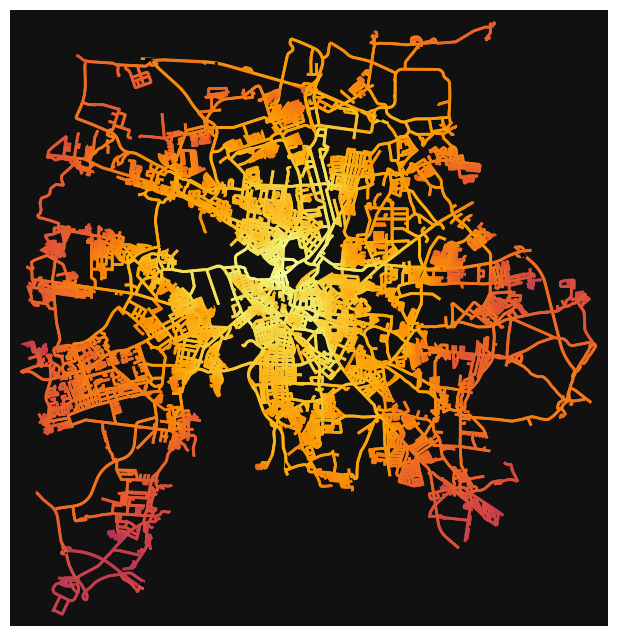

In [12]:
# convert graph to line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(Z))
nx.set_edge_attributes(Z, edge_centrality, "edge_centrality")

ec = ox.plot.get_edge_colors_by_attr(Z, "edge_centrality", cmap="inferno")
fig, ax = ox.plot_graph(Z, edge_color=ec, edge_linewidth=2, node_size=0)

In [21]:
edge_centrality = nx.closeness_centrality(nx.line_graph(U))
nx.set_edge_attributes(U, edge_centrality, "edge_centrality")

ec = ox.plot.get_edge_colors_by_attr(U, "edge_centrality", cmap="inferno")
fig, ax = ox.plot_graph(U, edge_color=ec, edge_linewidth=2, node_size=0)

NameError: name 'U' is not defined

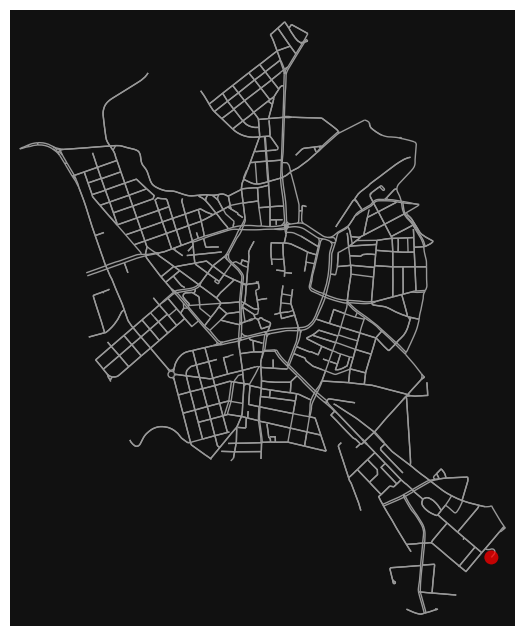

In [16]:
# impute missing edge speeds and calculate edge travel times with the speed module
U = ox.routing.add_edge_speeds(U)
U = ox.routing.add_edge_travel_times(U)

# get the nearest network nodes to two lat/lng points with the distance module
orig = ox.distance.nearest_nodes(U, X=51.33728692548108, Y=12.372628697737548)
dest = ox.distance.nearest_nodes(U, X=51.32753535608199, Y=12.388720066025176)

# find the shortest path between nodes, minimizing travel time, then plot it
route = ox.shortest_path(U, orig, dest, weight="travel_time")
fig, ax = ox.plot_graph_route(U, route, node_size=0)

In [ ]:
# you can make query an unambiguous dict to help the geocoder find it
place = {"city": "San Francisco", "state": "California", "country": "USA"}
G = ox.graph_from_place(place, network_type="drive", truncate_by_edge=True)
fig, ax = ox.plot_graph(G, figsize=(10, 10), node_size=0, edge_color="y", edge_linewidth=0.2)

In [ ]:
# or get network by address, coordinates, bounding box, or any custom polygon
# ...useful when OSM just doesn't already have a polygon for the place you want
wurster_hall = (37.870605, -122.254830)
one_mile = 1609  # meters
G = ox.graph_from_point(wurster_hall, dist=one_mile, network_type="drive")
fig, ax = ox.plot_graph(G, node_size=0)

In [ ]:
# get Leipzig tram network
Z = ox.graph_from_place(
    "Leipzig, Saxony, Germany",
    retain_all=False,
    truncate_by_edge=True,
    simplify=True,
    custom_filter='["railway"~"tram"]',
)

fig, ax = ox.plot_graph(Z, node_size=0, edge_color="w", edge_linewidth=0.2)

In [ ]:
Z = ox.graph_from_place(
    "Leipzig, Saxony, Germany",
    retain_all=False,
    truncate_by_edge=True,
    simplify=True,
    custom_filter='["waterway"~"canal"]',
)

fig, ax = ox.plot_graph(Z, node_size=0, edge_color="w", edge_linewidth=0.2)

In [ ]:
# get all building footprints in some neighborhood
place = "SoHo, New York, NY"
tags = {"building": True}
gdf = ox.features_from_place(place, tags)
gdf.shape

fig, ax = ox.plot_footprints(gdf, figsize=(3, 3))

In [ ]:
G2 = ox.graph_from_address(
    "N. Sicily Pl., Chandler, Arizona",
    dist=800,
    network_type="drive",
    truncate_by_edge=True,
)
origin = (33.307792, -111.894940)
destination = (33.312994, -111.894998)
origin_node = ox.distance.nearest_nodes(G2, origin[1], origin[0])
destination_node = ox.distance.nearest_nodes(G2, destination[1], destination[0])
route = ox.shortest_path(G2, origin_node, destination_node)
fig, ax = ox.plot_graph_route(G2, route, route_color="c", node_size=0)

In [ ]:
location_point = (33.299896, -111.831638)
G2 = ox.graph_from_point(location_point, dist=400, truncate_by_edge=True)
origin = (33.301821, -111.829871)
destination = (33.301402, -111.833108)
origin_node = ox.distance.nearest_nodes(G2, origin[1], origin[0])
destination_node = ox.distance.nearest_nodes(G2, destination[1], destination[0])
route = ox.shortest_path(G2, origin_node, destination_node)
fig, ax = ox.plot_graph_route(G2, route, route_color="c", node_size=0)